Files already downloaded and verified
Creating IID Clients...
Client IID-1 Class Distribution:
  airplane: 2500 samples
  automobile: 2500 samples
  bird: 2500 samples
  cat: 2500 samples
  deer: 2500 samples
  dog: 2500 samples
  frog: 2500 samples
  horse: 2500 samples
  ship: 2500 samples
  truck: 2500 samples
Client IID-2 Class Distribution:
  airplane: 2500 samples
  automobile: 2500 samples
  bird: 2500 samples
  cat: 2500 samples
  deer: 2500 samples
  dog: 2500 samples
  frog: 2500 samples
  horse: 2500 samples
  ship: 2500 samples
  truck: 2500 samples
Client IID-3 Class Distribution:
  airplane: 2500 samples
  automobile: 2500 samples
  bird: 2500 samples
  cat: 2500 samples
  deer: 2500 samples
  dog: 2500 samples
  frog: 2500 samples
  horse: 2500 samples
  ship: 2500 samples
  truck: 2500 samples
Client IID-4 Class Distribution:
  airplane: 2500 samples
  automobile: 2500 samples
  bird: 2500 samples
  cat: 2500 samples
  deer: 2500 samples
  dog: 2500 samples
  frog: 2500

findfont: Font family 'CMU Serif' not found.
findfont: Font family 'CMU Serif' not found.
findfont: Font family 'CMU Serif' not found.
findfont: Font family 'CMU Serif' not found.
findfont: Font family 'CMU Serif' not found.
findfont: Font family 'CMU Serif' not found.
findfont: Font family 'CMU Serif' not found.
findfont: Font family 'CMU Serif' not found.
findfont: Font family 'CMU Serif' not found.
findfont: Font family 'CMU Serif' not found.
findfont: Font family 'CMU Serif' not found.
findfont: Font family 'CMU Serif' not found.
findfont: Font family 'CMU Serif' not found.
findfont: Font family 'CMU Serif' not found.
findfont: Font family 'CMU Serif' not found.
findfont: Font family 'CMU Serif' not found.
findfont: Font family 'CMU Serif' not found.
findfont: Font family 'CMU Serif' not found.
findfont: Font family 'CMU Serif' not found.
findfont: Font family 'CMU Serif' not found.
findfont: Font family 'CMU Serif' not found.
findfont: Font family 'CMU Serif' not found.
findfont: 

Client non-IID-4 Class Distribution:
  airplane: 5000 samples
  automobile: 5000 samples
  bird: 571 samples
  cat: 2 samples
  deer: 160 samples
  dog: 228 samples
  frog: 5000 samples
  horse: 3821 samples
  ship: 513 samples
  truck: 1453 samples

Applying GAN Augmentation to non-IID Clients...

Augmenting Client non-IID-1:
  airplane - Removing 2500 samples to reach 2500
  automobile - Adding 1039 samples to reach 2500
  bird - Adding 1143 samples to reach 2500
  cat - Adding 2321 samples to reach 2500
  deer - Adding 2428 samples to reach 2500
  dog - Removing 2500 samples to reach 2500
  frog - Removing 2500 samples to reach 2500
  horse - Adding 2089 samples to reach 2500
  ship - Adding 2450 samples to reach 2500
  truck - Adding 1576 samples to reach 2500

Augmenting Client non-IID-2:
  airplane - Removing 1131 samples to reach 2500
  automobile - Adding 279 samples to reach 2500
  bird - Adding 1007 samples to reach 2500
  cat - Adding 1323 samples to reach 2500
  deer - Remo

findfont: Font family 'CMU Serif' not found.
findfont: Font family 'CMU Serif' not found.
findfont: Font family 'CMU Serif' not found.
findfont: Font family 'CMU Serif' not found.
findfont: Font family 'CMU Serif' not found.
findfont: Font family 'CMU Serif' not found.
findfont: Font family 'CMU Serif' not found.
findfont: Font family 'CMU Serif' not found.
findfont: Font family 'CMU Serif' not found.
findfont: Font family 'CMU Serif' not found.
findfont: Font family 'CMU Serif' not found.
findfont: Font family 'CMU Serif' not found.
findfont: Font family 'CMU Serif' not found.
findfont: Font family 'CMU Serif' not found.
findfont: Font family 'CMU Serif' not found.
findfont: Font family 'CMU Serif' not found.
findfont: Font family 'CMU Serif' not found.
findfont: Font family 'CMU Serif' not found.
findfont: Font family 'CMU Serif' not found.
findfont: Font family 'CMU Serif' not found.
findfont: Font family 'CMU Serif' not found.
findfont: Font family 'CMU Serif' not found.
findfont: 

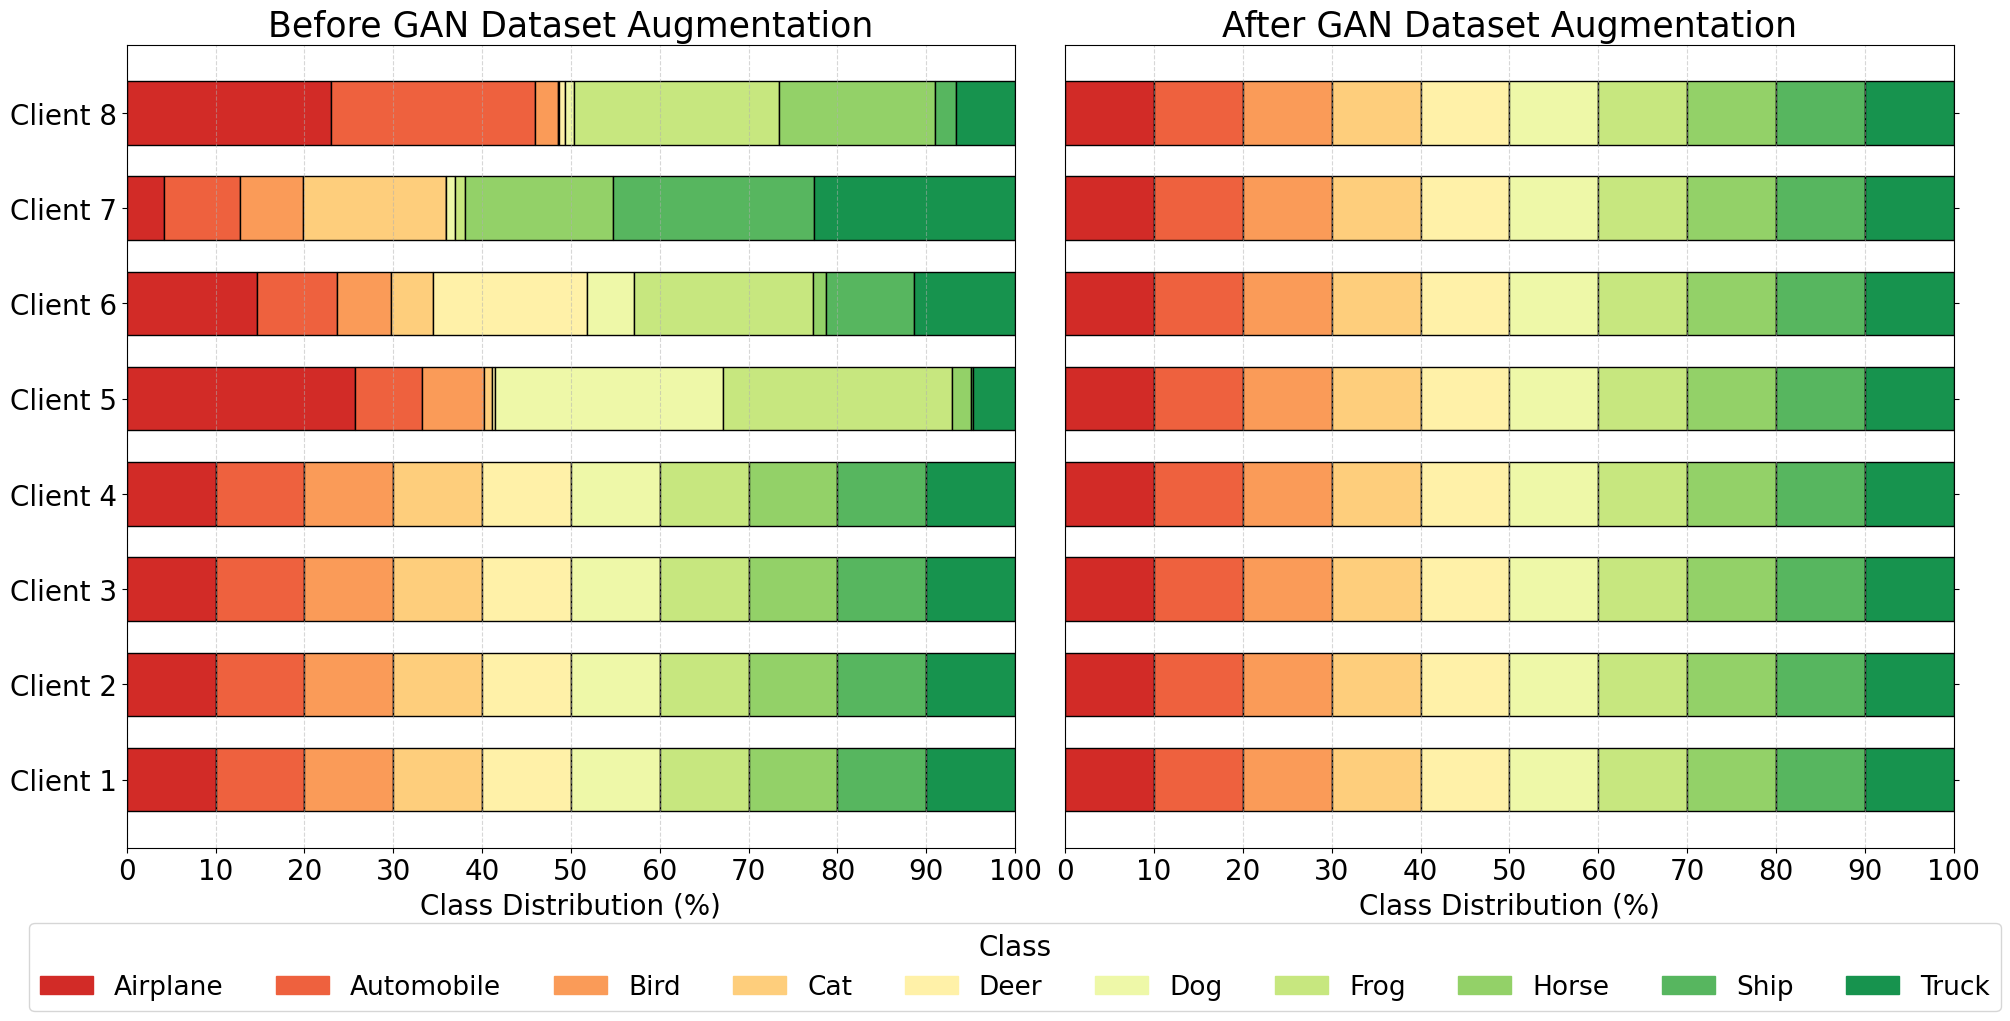

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
from torchvision.datasets import CIFAR10
from torchvision.transforms import Compose, Normalize, ToTensor
from torch.utils.data import Subset
import random
import seaborn as sns

# Imposta il font per i plot
plt.rcParams['font.family'] = 'CMU Serif'

# Definisci i nomi delle classi
CLASS_NAMES = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

def create_perfect_iid_clients(num_clients, dataset, samples_per_client=25000):
    """
    Crea client IID con una distribuzione perfettamente bilanciata delle classi.

    Args:
        num_clients (int): Numero di client da creare.
        dataset (Dataset): Dataset da suddividere.
        samples_per_client (int): Numero totale di campioni per client.

    Returns:
        list: Lista di tuple (Subset, Counter) per ogni client.
    """
    class_to_indices = {i: [] for i in range(10)}
    for idx, (_, label) in enumerate(dataset):
        class_to_indices[label].append(idx)
    clients_data = []
    for client_id in range(num_clients):
        selected_indices = []
        for cls in range(10):
            selected = random.sample(class_to_indices[cls], samples_per_client // 10)
            selected_indices.extend(selected)
        subset_labels = [dataset[idx][1] for idx in selected_indices]
        class_distribution = Counter(subset_labels)
        clients_data.append((Subset(dataset, selected_indices), class_distribution))
        print(f"Client IID-{client_id+1} Class Distribution:")
        for cls in range(10):
            print(f"  {CLASS_NAMES[cls]}: {class_distribution.get(cls, 0)} samples")
    return clients_data

def create_non_iid_clients(num_clients, dataset, samples_per_client=25000, alpha=0.5):
    """
    Crea client non-IID con distribuzioni delle classi variabili.

    Args:
        num_clients (int): Numero di client da creare.
        dataset (Dataset): Dataset da suddividere.
        samples_per_client (int): Numero totale di campioni per client.
        alpha (float): Parametro della distribuzione di Dirichlet per la non-IIDness.

    Returns:
        list: Lista di tuple (Subset, Counter) per ogni client.
    """
    clients_data = []
    for client_id in range(num_clients):
        class_to_indices = {i: [] for i in range(10)}
        for idx, (_, label) in enumerate(dataset):
            class_to_indices[label].append(idx)
        proportions = np.random.dirichlet([alpha] * 10)
        class_counts = (proportions * samples_per_client).astype(int)
        
        # Gestione della discrepanza dovuta alla conversione a int
        discrepancy = samples_per_client - class_counts.sum()
        if discrepancy > 0:
            class_counts[np.argmax(proportions)] += discrepancy
        elif discrepancy < 0:
            discrepancy = abs(discrepancy)
            class_counts[np.argmax(proportions)] -= min(discrepancy, class_counts[np.argmax(proportions)])
        
        selected_indices = []
        for cls, count in enumerate(class_counts):
            available_indices = class_to_indices[cls]
            if count > len(available_indices):
                selected = available_indices.copy()
            else:
                selected = random.sample(available_indices, min(count, len(available_indices)))
            selected_indices.extend(selected)
        subset_labels = [dataset[i][1] for i in selected_indices]
        class_distribution = Counter(subset_labels)
        clients_data.append((Subset(dataset, selected_indices), class_distribution))
        print(f"Client non-IID-{client_id+1} Class Distribution:")
        for cls in range(10):
            print(f"  {CLASS_NAMES[cls]}: {class_distribution.get(cls, 0)} samples")
    return clients_data

def augment_with_gan(clients_data, target_samples_per_class=2500):
    """
    Simula l'augmentazione con GAN aggiungendo o rimuovendo campioni sintetici per riequilibrare la distribuzione delle classi.

    Args:
        clients_data (list): Lista di tuple (Subset, Counter) contenente i dati e la distribuzione delle classi.
        target_samples_per_class (int): Numero di campioni desiderato per ogni classe.

    Returns:
        list: Lista di tuple (Subset, Counter) con la distribuzione aggiornata.
    """
    augmented_clients_data = []
    for idx, (subset, class_distribution) in enumerate(clients_data):
        new_class_distribution = Counter(class_distribution)  # Crea una copia del Counter
        print(f"\nAugmenting Client non-IID-{idx+1}:")
        for cls in range(10):
            current_count = new_class_distribution[cls]
            if current_count < target_samples_per_class:
                additional_samples = target_samples_per_class - current_count
                new_class_distribution[cls] += additional_samples
                print(f"  {CLASS_NAMES[cls]} - Adding {additional_samples} samples to reach {target_samples_per_class}")
            elif current_count > target_samples_per_class:
                samples_to_remove = current_count - target_samples_per_class
                new_class_distribution[cls] -= samples_to_remove
                print(f"  {CLASS_NAMES[cls]} - Removing {samples_to_remove} samples to reach {target_samples_per_class}")
            else:
                print(f"  {CLASS_NAMES[cls]} - No augmentation needed (current: {current_count})")
        augmented_clients_data.append((subset, new_class_distribution))
    return augmented_clients_data

transform = Compose([ToTensor(), Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
cifar10_train = CIFAR10(root="./", train=True, download=True, transform=transform)

# Creazione dei client IID e non-IID
print("Creating IID Clients...")
iid_clients = create_perfect_iid_clients(4, cifar10_train, samples_per_client=25000)

print("\nCreating non-IID Clients...")
non_iid_clients = create_non_iid_clients(4, cifar10_train, samples_per_client=25000, alpha=0.5)

# Applicazione dell'augmentazione con GAN
print("\nApplying GAN Augmentation to non-IID Clients...")
non_iid_clients_augmented = augment_with_gan(non_iid_clients, target_samples_per_class=2500)

# Raccolta delle distribuzioni prima e dopo l'augmentazione
clients_distributions_before = [client[1] for client in iid_clients + non_iid_clients]
clients_distributions_after = [client[1] for client in iid_clients + non_iid_clients_augmented]

# Stampa delle distribuzioni delle classi prima e dopo l'augmentazione
def print_distributions(distributions, title):
    print(f"\n{title}")
    for client_id, distribution in enumerate(distributions, 1):
        print(f"\nClient {client_id} Class Distribution:")
        for cls in range(10):
            print(f"  {CLASS_NAMES[cls]}: {distribution.get(cls, 0)} samples")

print_distributions(clients_distributions_before, "Class Distribution Before GAN Augmentation")
print_distributions(clients_distributions_after, "Class Distribution After GAN Augmentation")

def plot_distributions_combined_updated(distributions_before, distributions_after):
    distributions_percentages_before = []
    distributions_percentages_after = []

    for distribution in distributions_before:
        total_samples = sum(distribution.values())
        percentages = [distribution.get(cls, 0) / total_samples * 100 for cls in range(10)]
        distributions_percentages_before.append(percentages)

    for distribution in distributions_after:
        total_samples = sum(distribution.values())
        percentages = [distribution.get(cls, 0) / total_samples * 100 for cls in range(10)]
        distributions_percentages_after.append(percentages)

    cmap = sns.color_palette("RdYlGn", n_colors=10)
    fig, axes = plt.subplots(1, 2, figsize=(20, 10), sharey=True)
    row_gap = 1.2
    rows = np.arange(len(distributions_percentages_before)) * row_gap

    def draw_graph(ax, distributions, title, ytick_position):
        for i, percentages in enumerate(distributions):
            left_offset = 0
            for j, percentage in enumerate(percentages):
                ax.barh(
                    rows[i], 
                    percentage, 
                    color=cmap[j], 
                    edgecolor="black", 
                    height=0.8,
                    left=left_offset
                )
                left_offset += percentage

        ax.set_title(title, fontsize=25)
        ax.set_xticks(np.arange(0, 101, 10))
        ax.xaxis.set_tick_params(labelsize=20)
        ax.set_xlim(0, 100)  # Limita esattamente a 0-100
        ax.set_xlabel("Class Distribution (%)", fontsize=20)
        ax.grid(axis="x", linestyle="--", alpha=0.5)

        if ytick_position == "left":
            ax.set_yticks(rows)
            ax.set_yticklabels([f"Client {i + 1}" for i in range(len(rows))], fontsize=20)
            ax.yaxis.tick_left()
            ax.yaxis.set_label_position("left")
        elif ytick_position == "right":
            ax.set_yticks(rows)
            ax.set_yticklabels([f"Client {i + 1}" for i in range(len(rows))], fontsize=20)
            ax.yaxis.tick_right()
            ax.yaxis.set_label_position("right")

    draw_graph(axes[0], distributions_percentages_before, "Before GAN Dataset Augmentation", "left")
    draw_graph(axes[1], distributions_percentages_after, "After GAN Dataset Augmentation", "right")

    legend_labels = ["Airplane", "Automobile", "Bird", "Cat", "Deer", "Dog", "Frog", "Horse", "Ship", "Truck"]
    handles = [plt.Rectangle((0, 0), 1, 1, color=color) for color in cmap]
    fig.legend(handles, legend_labels, title="Class", title_fontsize='20', loc="lower center", ncol=10, fontsize=19, bbox_to_anchor=(0.51, -0.06))

    plt.tight_layout(rect=[0, 0.03, 1, 0.97])
    plt.savefig("GAN.pdf", bbox_inches="tight")
    plt.show()

plot_distributions_combined_updated(clients_distributions_before, clients_distributions_after)